In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df = pd.read_excel("ANALISIS_PRECIOS.xlsx")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TITULO          42 non-null     object 
 1   LARGO(CM)       42 non-null     int64  
 2   ALTO(CM)        42 non-null     int64  
 3   PESO(KG)        41 non-null     float64
 4   COLOR           42 non-null     object 
 5   REGULABLE       42 non-null     object 
 6   AGUJERO_FACIAL  42 non-null     object 
 7   Cuerpos         42 non-null     int64  
 8   MATERIAL        42 non-null     object 
 9   PRECIO          42 non-null     object 
 10  PROVEEDOR       42 non-null     object 
 11  LINK            42 non-null     object 
 12  TIPO            42 non-null     object 
dtypes: float64(1), int64(3), object(9)
memory usage: 4.4+ KB


In [5]:
# Me aseguro de limpiar la columna
# Creo una función que limpie y convierta los precios a formato numérico
def clean_and_convert_price(price):
    # Elimino el símbolo de euro y convertimos la coma en punto
    if isinstance(price, str):
        return float(price.replace('€', '').replace(',', '.').strip())
    return price

# Aplico la función a la columna 'PRECIO'
df['PRECIO_CLEAN'] = df['PRECIO'].apply(clean_and_convert_price)

# Reviso
df[['PRECIO', 'PRECIO_CLEAN']].head()


,PRECIO,PRECIO_CLEAN
0,"249,00",249.0
1,"209,00",209.0
2,"235,00",235.0
3,"139,00",139.0
4,"235,00",235.0


In [10]:
# Estadísticas descriptivas para la columna de precios limpios
price_stats = df['PRECIO_CLEAN'].describe()

# Análisis de la variación de precios por proveedor
price_by_provider = df.groupby('PROVEEDOR')['PRECIO_CLEAN'].describe()

price_stats.T


count     42.000000
mean     173.354048
std      104.829765
min       69.990000
25%       99.960000
50%      139.475000
75%      209.000000
max      575.690000
Name: PRECIO_CLEAN, dtype: float64

In [9]:
price_by_provider

,count,mean,std,min,25%,50%,75%,max
PROVEEDOR,,,,,,,,
BELTOM-AMAZON,2.0,94.970000,7.099352,89.95,92.4600,94.970,97.4800,99.99
ECOPOSTURAL,1.0,575.690000,NaN,575.69,575.6900,575.690,575.6900,575.69
FISIOMARKET,2.0,118.155000,13.088547,108.90,113.5275,118.155,122.7825,127.41
MOBICLINIC-AMAZON,1.0,99.950000,NaN,99.95,99.9500,99.950,99.9500,99.95
PODOSERVICE,3.0,336.446667,127.435002,209.00,272.7350,336.470,400.1700,463.87
QUIRUMED,20.0,123.682000,55.412838,69.99,89.9900,103.990,145.2400,299.95
STETICAPROFESIONAL,13.0,207.384615,49.728494,139.00,179.0000,209.000,235.0000,289.00


Las estadísticas descriptivas de los precios de todos los proveedores son las siguientes:

- **Cantidad de productos analizados**: 42
- **Precio medio**: 173.35 €
- **Desviación estándar**: 104.83 €
- **Precio mínimo**: 69.99 €
- **Precio en el 25%**: 99.96 € (el 25% de los productos tienen un precio menor o igual a este valor)
- **Mediana (50%)**: 139.48 €
- **Precio en el 75%**: 209.00 € (el 75% de los productos tienen un precio menor o igual a este valor)
- **Precio máximo**: 575.69 €

Además, al observar los precios por proveedor, notamos lo siguiente:

- **Quirumed** los 20 productos en el análisis con un precio medio de 123.68 € y una desviación estándar de 55.41 €, lo cual indica una variabilidad moderada en sus precios.
- **Steticaprofesional** presenta el mayor número de productos después de Quirumed, con 13 productos y un precio medio de 207.38 €.
- **Podoservice** tiene los precios más altos en promedio con 336.45 €, aunque esto se basa en solo 3 productos.
- **Ecopostural** solo tiene un producto en el análisis, pero es el más caro con un precio de 575.69 €.
- **Beltom-Amazon** tiene los precios más bajos en promedio con 94.97 € basados en 2 productos.

Fuera de Amazon, **Quirumed** tiene de los precios mas bajos de mercado

Este análisis nos proporciona una visión general del posicionamiento de Quirumed en el mercado en términos de precio en comparación con sus competidores. El siguiente paso sería realizar un análisis comparativo más detallado entre los precios de Quirumed y cada competidor para productos similares. ¿Debo proceder con ese análisis o hay algo más específico que te gustaría saber?

In [17]:
# Nueva columna que combine las medidas de 'LARGO(CM)' y 'ALTO(CM)' para identificar productos con dimensiones similares.
df['DIMENSIONES'] = df['LARGO(CM)'].astype(str) + "x" + df['ALTO(CM)'].astype(str)

# Segmento los datos por estas nuevas dimensiones y luego comparo los precios de los productos segmentados.
dimension_groups = df.groupby(['DIMENSIONES', 'PROVEEDOR'])['PRECIO_CLEAN'].describe()

# Dado que quiero comparar precios de productos con dimensiones similares, voy a filtrar los grupos que tienen más de un proveedor.
# Para eso, necesito identificar las dimensiones que tienen múltiples proveedores y luego filtrar esos datos.
dimension_providers_count = df.groupby('DIMENSIONES')['PROVEEDOR'].nunique()
dimensions_with_multiple_providers = dimension_providers_count[dimension_providers_count > 1].index

# Filtro los grupos de dimensiones con múltiples proveedores.
dimension_comparison = dimension_groups.loc[dimensions_with_multiple_providers]

dimension_comparison.reset_index().head()



,DIMENSIONES,PROVEEDOR,count,mean,std,min,25%,50%,75%,max
0,180x60,MOBICLINIC-AMAZON,1.0,99.95,NaN,99.95,99.95,99.95,99.95,99.95
1,180x60,QUIRUMED,2.0,80.49,14.849242,69.99,75.24,80.49,85.74,90.99
2,182x60,QUIRUMED,1.0,78.99,NaN,78.99,78.99,78.99,78.99,78.99
3,182x60,STETICAPROFESIONAL,2.0,139.00,0.000000,139.00,139.00,139.00,139.00,139.00
4,186x60,FISIOMARKET,1.0,127.41,NaN,127.41,127.41,127.41,127.41,127.41


Una comparación de la segmentación:

- **Dimensiones 180x60 cm**:
  - **Mobiclinic-Amazon**: Solo 1 producto con un precio de 99.95 €.
  - **Quirumed**: 2 productos con un precio medio de 80.49 € y una variación de 14.85 € entre ellos.

- **Dimensiones 182x60 cm**:
  - **Quirumed**: Solo 1 producto con un precio de 78.99 €.
  - **Steticaprofesional**: 2 productos con un precio constante de 139.00 €.

- **Dimensiones 186x60 cm**:
  - **FisioMarket**: Solo 1 producto con un precio de 127.41 €.
  - No hay otro proveedor con esta dimensión para comparar en el conjunto de datos proporcionado.

Estos resultados sugieren que, para las dimensiones comparables, Quirumed tiene precios competitivos. Por ejemplo, para las dimensiones 180x60 cm, Quirumed ofrece precios ligeramente más bajos que Mobiclinic-Amazon. En las dimensiones 182x60 cm, Quirumed ofrece un precio considerablemente más bajo que Steticaprofesional.

In [19]:
# Calculo un 'volumen' aproximado multiplicando la altura por el largo
# para tener una métrica única de tamaño.
df['VOLUME'] = df['LARGO(CM)'] * df['ALTO(CM)']

# Calculo los cuartiles para esta nueva métrica de 'volumen'.
volume_quartiles = df['VOLUME'].quantile([0.25, 0.5, 0.75])

# Agrego una nueva columna al DataFrame para categorizar cada producto en su cuartil correspondiente.
df['VOLUME_QUARTILE'] = pd.cut(df['VOLUME'], 
                                      bins=[0, volume_quartiles[0.25], volume_quartiles[0.5], volume_quartiles[0.75], df['VOLUME'].max()], 
                                      labels=['1st Quartile', '2nd Quartile', '3rd Quartile', '4th Quartile'], 
                                      include_lowest=True)

# Visualizo cuántos productos de Quirumed y de otros proveedores caen en cada cuartil
quartile_distribution = df.groupby(['PROVEEDOR', 'VOLUME_QUARTILE']).size().unstack(fill_value=0)

quartile_distribution


/var/folders/3y/gmmx0lf10498qy36ms6x0q5w0000gn/T/ipykernel_1682/921469613.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quartile_distribution = df.groupby(['PROVEEDOR', 'VOLUME_QUARTILE']).size().unstack(fill_value=0)


VOLUME_QUARTILE,1st Quartile,2nd Quartile,3rd Quartile,4th Quartile
PROVEEDOR,,,,
BELTOM-AMAZON,1,1,0,0
ECOPOSTURAL,0,1,0,0
FISIOMARKET,1,1,0,0
MOBICLINIC-AMAZON,1,0,0,0
PODOSERVICE,0,0,0,3
QUIRUMED,5,3,7,5
STETICAPROFESIONAL,8,0,2,3


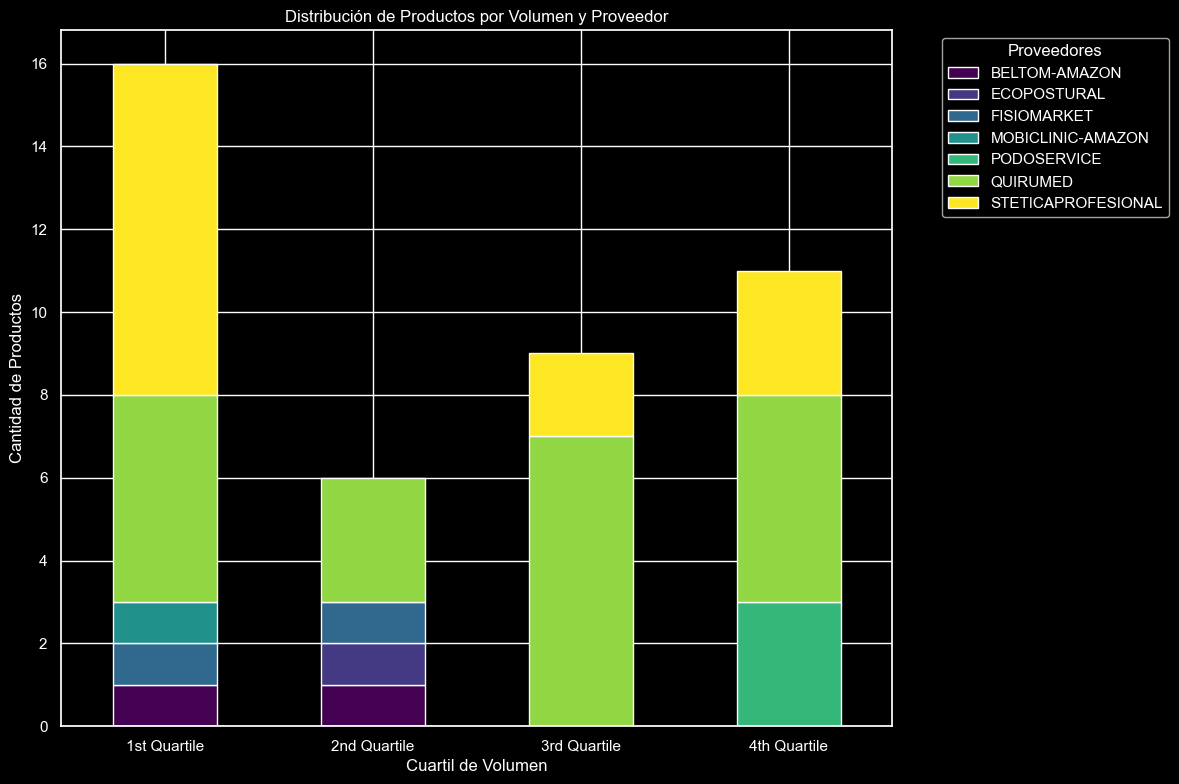

In [32]:
# Estilo de fondo oscuro para las visualizaciones
sns.set(style="darkgrid")
plt.style.use("dark_background")

# Datos para la visualización
quartile_distribution_vis = quartile_distribution.T

# Gráfico de barras apiladas para visualizar la distribución de productos por cuartil y proveedor
fig, ax = plt.subplots(figsize=(12, 8))

quartile_distribution_vis.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')

# Etiquetas y título al gráfico
plt.title('Distribución de Productos por Volumen y Proveedor')
plt.xlabel('Cuartil de Volumen')
plt.ylabel('Cantidad de Productos')
plt.legend(title='Proveedores', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajusto los límites y la orientación de las etiquetas del eje x
plt.setp(ax.get_xticklabels(), rotation=0, horizontalalignment='center')
plt.tight_layout()
plt.show()


El gráfico de barras apiladas que representa la distribución de productos por cuartil de volumen y proveedor. Quirumed tiene una presencia significativa en todos los cuartiles, lo que indica una variedad de productos en términos de tamaño. Los competidores tienden a concentrarse en ciertos cuartiles, por ejemplo, Steticaprofesional tiene una mayor cantidad de productos en el primer cuartil, y Podoservice en el cuarto cuartil.

/var/folders/3y/gmmx0lf10498qy36ms6x0q5w0000gn/T/ipykernel_1682/618092773.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quartile_price_means = df.groupby('VOLUME_QUARTILE')['PRECIO_CLEAN'].mean()
/var/folders/3y/gmmx0lf10498qy36ms6x0q5w0000gn/T/ipykernel_1682/618092773.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quartile_ranges = df.groupby('VOLUME_QUARTILE')['VOLUME'].agg([min, max])
/var/folders/3y/gmmx0lf10498qy36ms6x0q5w0000gn/T/ipykernel_1682/618092773.py:6: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the 

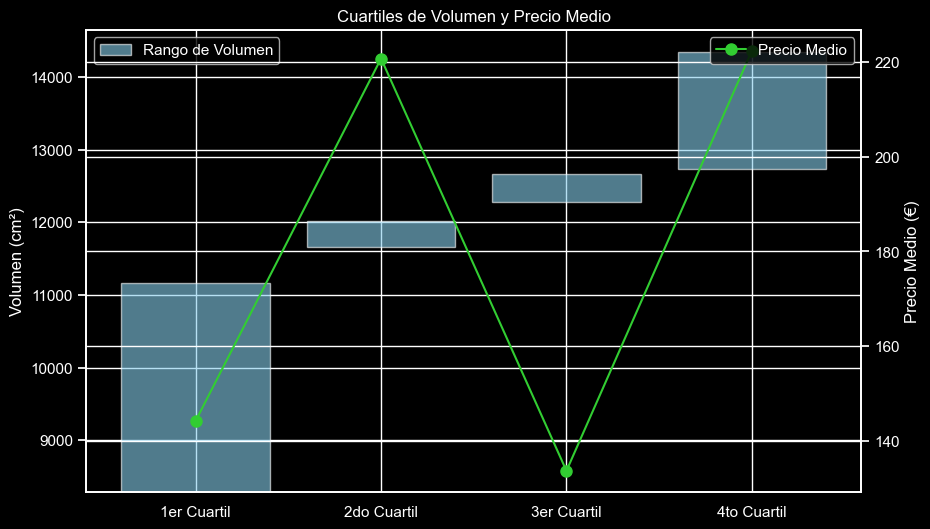

In [23]:
#Calculo la media de precio por cuartil.
quartile_price_means = df.groupby('VOLUME_QUARTILE')['PRECIO_CLEAN'].mean()

# Preparo los datos para la visualización
quartile_ranges = df.groupby('VOLUME_QUARTILE')['VOLUME'].agg([min, max])

# Uno los rangos de volumen con la media de precio por cuartil
quartile_info = pd.concat([quartile_ranges, quartile_price_means], axis=1)
quartile_info.columns = ['Volumen Mínimo', 'Volumen Máximo', 'Precio Medio']

# Creo el gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Configuro el eje x con los nombres de los cuartiles
quartiles = ['1er Cuartil', '2do Cuartil', '3er Cuartil', '4to Cuartil']
x = range(len(quartiles))

# Grafico los rangos de volumen como barras
ax1.bar(x, quartile_info['Volumen Máximo'] - quartile_info['Volumen Mínimo'], bottom=quartile_info['Volumen Mínimo'], color='skyblue', label='Rango de Volumen', alpha=0.6)

# Configuro el eje y para los rangos de volumen
ax1.set_ylabel('Volumen (cm²)')
ax1.set_title('Cuartiles de Volumen y Precio Medio')
ax1.set_xticks(x)
ax1.set_xticklabels(quartiles)
ax1.legend(loc='upper left')

# Creo un segundo eje y para el precio medio
ax2 = ax1.twinx()
ax2.plot(x, quartile_info['Precio Medio'], color='limegreen', label='Precio Medio', marker='o', markersize=8)
ax2.set_ylabel('Precio Medio (€)')
ax2.legend(loc='upper right')

plt.show()


In [74]:
df['PRECIO_CLEAN'] = df['PRECIO'].str.replace('€', '').str.replace(',', '.').astype(float)
df['VOLUME'] = df['LARGO(CM)'] * df['ALTO(CM)']
volume_quartiles = df['VOLUME'].quantile([0.25, 0.5, 0.75])
df['VOLUME_QUARTILE'] = pd.cut(df['VOLUME'], 
                                 bins=[0, volume_quartiles[0.25], volume_quartiles[0.5], volume_quartiles[0.75], df['VOLUME'].max()], 
                                 labels=['1st Quartile', '2nd Quartile', '3rd Quartile', '4th Quartile'], 
                                 include_lowest=True)

quartile_price_means = df.groupby('VOLUME_QUARTILE')['PRECIO_CLEAN'].mean()

quartile_ranges = df.groupby('VOLUME_QUARTILE')['VOLUME'].agg(['min', 'max'])

quartile_analysis = pd.concat([quartile_ranges, quartile_price_means], axis=1)
quartile_analysis.rename(columns={'min': 'Tamaño Mínimo', 'max': 'Tamaño Máximo', 'PRECIO_CLEAN': 'Precio Medio'}, inplace=True)


quartile_analysis


/var/folders/3y/gmmx0lf10498qy36ms6x0q5w0000gn/T/ipykernel_1682/828661915.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quartile_price_means = df.groupby('VOLUME_QUARTILE')['PRECIO_CLEAN'].mean()
/var/folders/3y/gmmx0lf10498qy36ms6x0q5w0000gn/T/ipykernel_1682/828661915.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quartile_ranges = df.groupby('VOLUME_QUARTILE')['VOLUME'].agg(['min', 'max'])


,Tamaño Mínimo,Tamaño Máximo,Precio Medio
VOLUME_QUARTILE,,,
1st Quartile,8288,11160,153.073077
2nd Quartile,11656,12025,179.976667
3rd Quartile,12276,12660,133.654444
4th Quartile,12740,14350,179.608750


In [61]:
df.head()

,TITULO,LARGO(CM),ALTO(CM),PESO(KG),COLOR,REGULABLE,AGUJERO_FACIAL,Cuerpos,MATERIAL,PRECIO,PROVEEDOR,LINK,TIPO,PRECIO_CLEAN,VOLUME,VOLUME_QUARTILE
0,Camilla Plegable 3 Cuerpos Aluminio Blanca,186,60,16.0,BLANCO,SI,SI,3,ALUMINIO,"249,00",STETICAPROFESIONAL,https://www.steticaprofesional.com/p11160819-c...,2,249.0,11160,1st Quartile
1,Camilla Plegable 2 Cuerpos Aluminio...,186,60,16.0,NEGRO,SI,SI,2,ALUMINIO,"209,00",STETICAPROFESIONAL,https://www.steticaprofesional.com/p11160065-c...,1,209.0,11160,1st Quartile
2,Camilla Portatil de Madera 3 Cuerpos,205,70,16.0,BLANCO,SI,NO,3,MADERA,"235,00",STETICAPROFESIONAL,https://www.steticaprofesional.com/p8338429-ca...,1,235.0,14350,4th Quartile
3,Camilla Plegable Dos Cuerpos Negra,182,60,31.0,NEGRO,SI,SI,2,MADERA,"139,00",STETICAPROFESIONAL,https://www.steticaprofesional.com/p7046957-ca...,1,139.0,10920,1st Quartile
4,Camilla Portatil Madera,185,60,40.0,BLANCO,SI,SI,2,MADERA,"235,00",STETICAPROFESIONAL,https://www.steticaprofesional.com/p7036660-ca...,1,235.0,11100,1st Quartile


In [44]:
df.shape

(42, 16)

In [62]:
df.iloc[:,[0,1,2,3,8,9,15]].sort_values("VOLUME_QUARTILE")

,TITULO,LARGO(CM),ALTO(CM),PESO(KG),MATERIAL,PRECIO,VOLUME_QUARTILE
0,Camilla Plegable 3 Cuerpos Aluminio Blanca,186,60,16.00,ALUMINIO,"249,00",1st Quartile
23,Camilla plegable de aluminio EASY 180 x 60 cm,180,60,11.00,ALUMINIO,"90,99",1st Quartile
17,Camilla plegable de aluminio BASIC PLUS 186 x ...,186,60,14.00,ALUMINIO,"81,99",1st Quartile
15,Camilla plegable de madera EASY 182 x 60 cm,182,60,13.20,MADERA,"78,99",1st Quartile
14,Camilla plegable de aluminio BASIC 186 x 60 cm,186,60,12.50,ALUMINIO,"73,99",1st Quartile
13,Camilla plegable de madera BASIC 180 X 60 cm,180,60,11.20,MADERA,"69,99",1st Quartile
9,Camilla Plegable 2 Cuerpos Aluminio...,186,60,16.00,ALUMINIO,"209,00",1st Quartile
8,Silla Masaje Blanca con Funda,105,80,10.50,ALUMINIO,"139,00",1st Quartile
40,BELTOM Camilla de Masaje 3 Zonas portatil 180 ...,180,56,14.50,MADERA,89.95,1st Quartile
38,CAMILLA PLEGABLE DE ALUMINIO 3 CUERPOS COLOR A...,186,60,13.00,ALUMINIO,127.41,1st Quartile


Busco la relación entre peso y precio

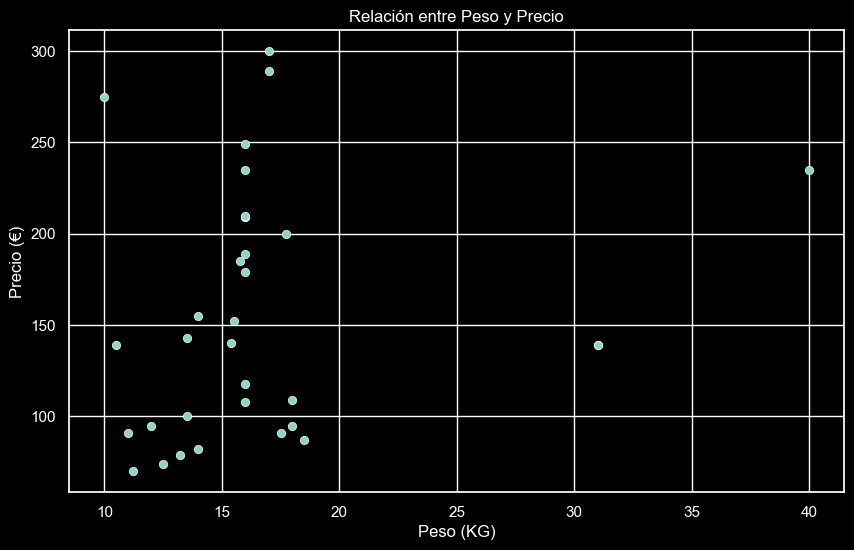

In [67]:

sns.set(style="darkgrid")
plt.style.use("dark_background")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PESO(KG)', y='PRECIO_CLEAN', data=df)

plt.title('Relación entre Peso y Precio')
plt.xlabel('Peso (KG)')
plt.ylabel('Precio (€)')

plt.show()


Hasta 15kg hay una relación positiva entre peso y precio, luego se estanca

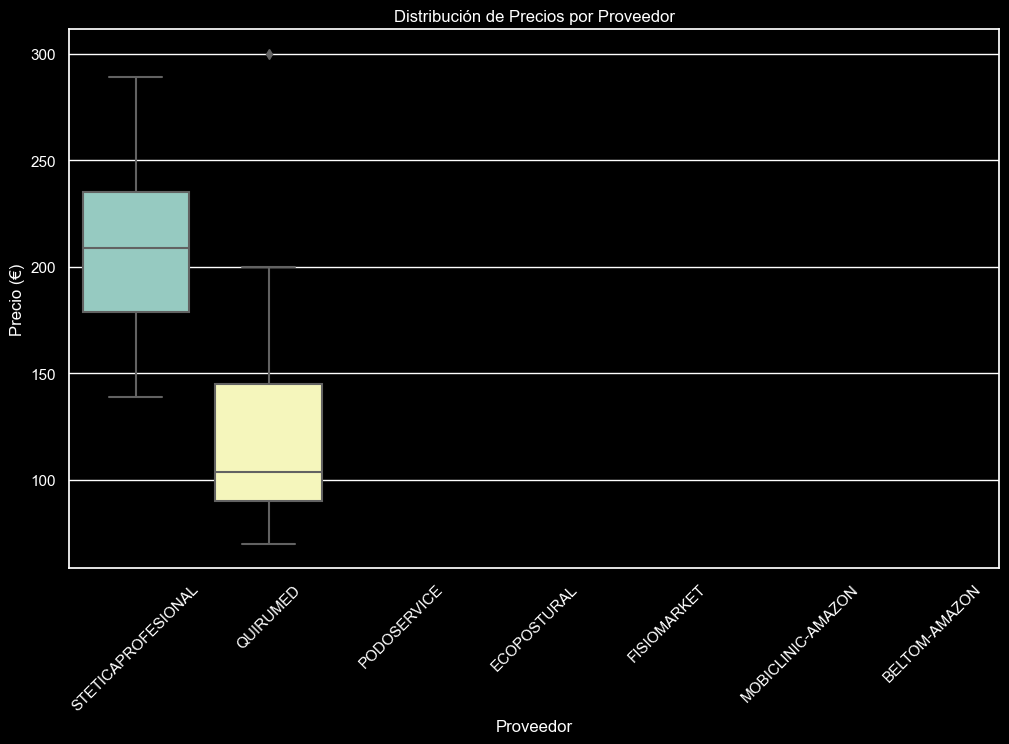

In [70]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='PROVEEDOR', y='PRECIO_CLEAN', data=df)
plt.title('Distribución de Precios por Proveedor')
plt.xticks(rotation=45)
plt.xlabel('Proveedor')
plt.ylabel('Precio (€)')

plt.show()


# Conclusiones

Los puntos clave del análisis incluyen:
- La cantidad de productos analizados es 42.
- Quirumed tiene un precio medio de **123.68 €** con una desviación estándar de **55.41 €**, lo que indica una variabilidad moderada en sus precios entre los 20 productos analizados.
- Se observa una relación positiva entre el peso y el precio de los productos hasta aproximadamente 15kg, después de lo cual la relación se estanca.
- La distribución de precios por proveedor muestra una variabilidad significativa en los precios.

**Conclusión sobre si Quirumed vende demasiado barato**:
Quirumed tiene un precio medio inferior en comparación con otros proveedores destacados en el análisis, como Steticaprofesional y Podoservice, lo cual podría indicar que sus precios son relativamente más bajos. Sin embargo, para determinar si Quirumed vende "demasiado barato", sería esencial considerar factores adicionales como la calidad de los productos, los costos de producción, y la estrategia de mercado de Quirumed. Basándose únicamente en el precio medio, Quirumed parece ofrecer productos a un precio más competitivo.

In [78]:
# Hipotético precio medio de la competencia
precio_medio_competencia = 150

# Quirumed quiere mantenerse un 5% más barato que la competencia
nuevo_precio_quirumed = precio_medio_competencia * (1 - 0.05)
nuevo_precio_quirumed


142.5

Si Quirumed desea mantenerse un 5% más barato que la competencia, y asumiendo un precio medio hipotético de la competencia de 150 €, podría subir sus precios hasta **142.5 €** sin afectar a su demanda. Esto representaría un incremento de aproximadamente **15.2%** sobre su precio medio actual de 123.68 €.